In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('Default of Credit Card Clients_training.csv')
# df = df.drop('ID', axis = 1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,300000.0,FEMALE,HIGH SCHOOL,MARRIED,39,2,0,0,2,2,...,41226.0,40263.0,42788.0,1929.0,4000.0,1446.0,0.0,3179.0,0.0,1
1,310000.0,MALE,GRADUATE SCHOOL,MARRIED,39,1,-1,0,0,0,...,22432.0,24058.0,25646.0,150000.0,1500.0,3000.0,2000.0,2000.0,3000.0,1
2,340000.0,FEMALE,UNIVERSITY,MARRIED,33,2,-1,-1,-1,-1,...,11190.0,8210.0,7981.0,11038.0,8591.0,11246.0,8251.0,8021.0,0.0,1
3,80000.0,FEMALE,UNIVERSITY,MARRIED,34,1,2,2,2,0,...,79076.0,31984.0,29306.0,3808.0,2804.0,30.0,1108.0,1108.0,1133.0,1
4,70000.0,FEMALE,UNIVERSITY,SINGLE,25,0,0,0,0,2,...,35122.0,28633.0,28039.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0,1


# Ini Untuk Eksplorasi Data

In [24]:
edu = df['EDUCATION'].value_counts()
edu_idx = list(edu.index)
edu_vals = list(edu.values)

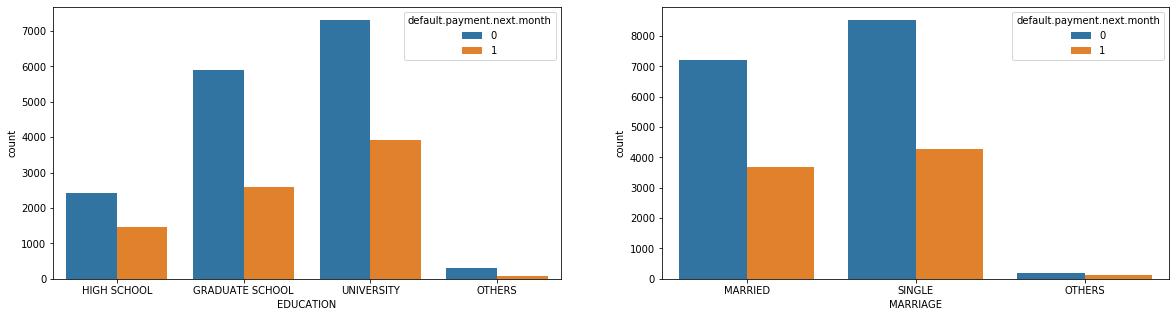

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df, ax=ax[0])
sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=df, ax=ax[1])
plt.show()

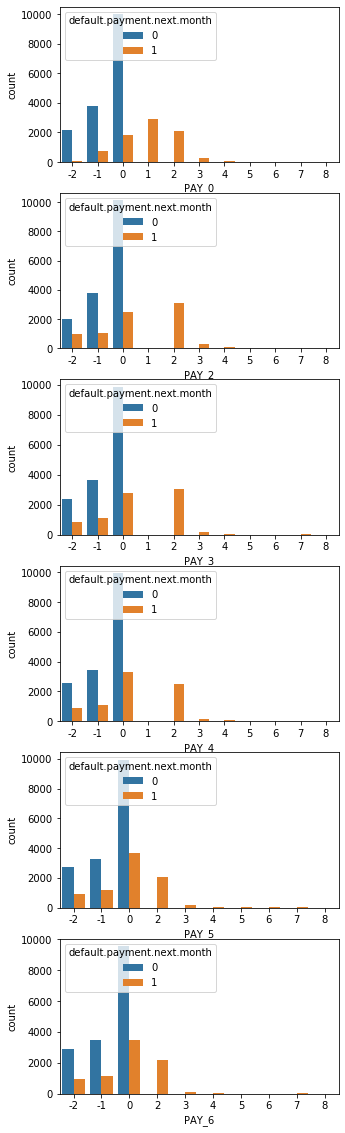

In [48]:
fig, ax = plt.subplots(nrows=6, figsize=(5, 20))
sns.countplot(x='PAY_0', hue='default.payment.next.month', data=df, ax=ax[0])
sns.countplot(x='PAY_2', hue='default.payment.next.month', data=df, ax=ax[1])
sns.countplot(x='PAY_3', hue='default.payment.next.month', data=df, ax=ax[2])
sns.countplot(x='PAY_4', hue='default.payment.next.month', data=df, ax=ax[3])
sns.countplot(x='PAY_5', hue='default.payment.next.month', data=df, ax=ax[4])
sns.countplot(x='PAY_6', hue='default.payment.next.month', data=df, ax=ax[5])
plt.show()

# Ini Untuk Pemodelan

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': 0.12
}
dt = DecisionTreeClassifier(random_state=42)